In [ ]:

import numpy as np
from keras.models import Sequential 
from keras.layers import Dense ,Flatten
from keras.utils import to_categorical              
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.optimizers import Adam


ImportError: cannot import name 'history' from 'keras.optimizers' (C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\optimizers\__init__.py)

uint8 (60000, 28, 28) uint8 (60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0  

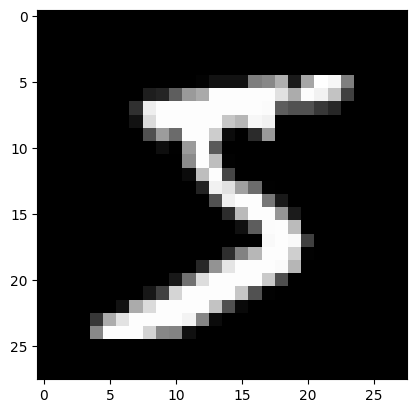

label is 5


In [15]:

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.dtype, X_train.shape, y_train.dtype, y_train.shape)
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()
print(f"label is {y_train[0]}")

In [ ]:
#method broadcasting to normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#to categorical conversion
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#1st layer
model.add(Dense(128,activation='relu'))#128 neuron 2nd layer
model.add(Dense(10,activation='softmax'))#3rd layer 

C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
#train the model
res=model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)
print("Code executed successfully")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 3.4908e-05 - val_accuracy: 1.0000 - val_loss: 4.7666e-05
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 2.4686e-05 - val_accuracy: 1.0000 - val_loss: 4.6723e-05
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 2.0356e-05 - val_accuracy: 1.0000 - val_loss: 4.4320e-05
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.6991e-05 - val_accuracy: 1.0000 - val_loss: 4.8913e-05
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.4254e-05 - val_accuracy: 1.0000 - val_loss: 4.6194e-05
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.1832e-05 - val_accuracy: 1.0000 - val_loss: 4.5733e-05
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.0126e-05 - val_accuracy: 1.0000 - val_loss: 5.7406e-05
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/s

In [49]:
# validation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.1490
Validation loss: 0.14900797605514526
Validation accuracy: 0.9787999987602234


In [50]:
print(res.history.keys())
print(res.history.values())
print(res.history)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9966250061988831, 0.9998124837875366], [3.490824383334257e-05, 2.468553248036187e-05, 2.035558645729907e-05, 1.6990979929687455e-05, 1.4254476809583139e-05, 1.1831854862975888e-05, 1.0126402230525855e-05, 9.599492841516621e-06, 0.01228778064250946, 0.0006120227626524866], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9986666440963745, 0.9989166855812073], [4.766572965309024e-05, 4.672303475672379e-05, 4.4319851440377533e-05, 4.8913432692643255e-05, 4.619446553988382e-05, 4.5733482693322e-05, 5.740587585023604e-05, 7.582724356325343e-05, 0.004096684046089649, 0.003251108108088374]])
{'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9966250061988831, 0.9998124837875366], 'loss': [3.490824383334257e-05, 2.468553248036187e-05, 2.035558645729907e-05, 1.6990979929687455e-05, 1.4254476809583139e-05, 1.1831854862975888e-05, 1.0126402230525855e-05, 9.599492841516621e-06, 0.0122